In [1]:
# Load packages
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load dataset
dataset = sio.loadmat('dataset.mat')

# load train and test sets
x_train = dataset['train_image']
x_test = dataset['test_image']
y_train = dataset['train_label']
y_test = dataset['test_label']

# Ensure count of train images and labels match
assert x_train.shape[0] == y_train.shape[0]
# Ensure count of test images and labels match
assert x_test.shape[0] == y_test.shape[0]

# Print number of train and test samples
print(len(x_train))
print(len(x_test))

200
100


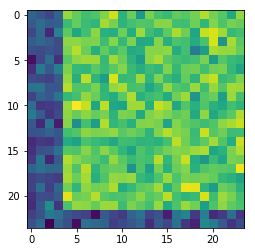

[1]


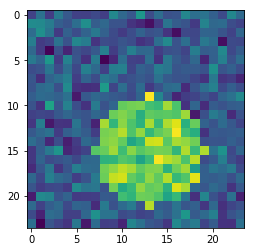

[0]


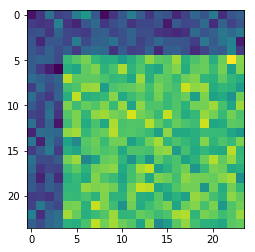

[1]


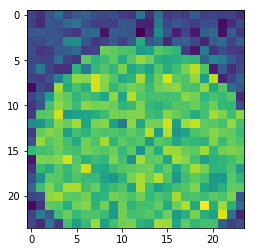

[0]


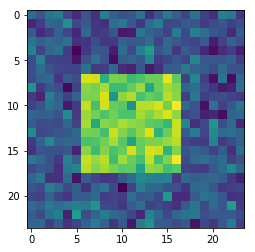

[1]


In [3]:
# Display first five images and corresponsing labels
for val in range(5):
    image_pixels = np.array(x_train[val,:,:], dtype='float').reshape((x_train.shape[1], x_train.shape[2]))
    plt.imshow(image_pixels)
    plt.show()
    print(y_train[val - 1])

In [4]:
# Models build accordingly by varying n_neighbors values from 1-10 and accuracies on training and testing datasets are printed
train_acc, test_acc = [], []

for i in range(1, 11):
    neigh = KNeighborsClassifier(n_neighbors=i, algorithm='kd_tree')
    # Reshaping training dataset
    nsamples_train, nx_train, ny_train = x_train.shape
    train_dataset = x_train.reshape((nsamples_train,nx_train*ny_train))
    # Model training
    neigh.fit(train_dataset, y_train)
    # Reshaping testing dataset
    nsamples_test, nx_test, ny_test = x_test.shape
    test_dataset = x_test.reshape((nsamples_test,nx_test*ny_test))
    # Model predictions on training dataset
    y_pred_train = neigh.predict(train_dataset)
    # Model prediction on testing dataset
    y_pred_test = neigh.predict(test_dataset)
    # Append training and testing accuracies
    train_acc.append(metrics.accuracy_score(y_train.flatten(), y_pred_train))
    test_acc.append(metrics.accuracy_score(y_test.flatten(), y_pred_test))

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [5]:
# Print accuracies of training and test dataset
#print(metrics.accuracy_score(y_train.flatten(), y_pred_train))
print(train_acc)
#print(metrics.accuracy_score(y_test.flatten(), y_pred_test))
print(test_acc)

[1.0, 0.92, 0.9, 0.835, 0.85, 0.82, 0.82, 0.82, 0.81, 0.795]
[0.81, 0.76, 0.8, 0.76, 0.78, 0.75, 0.75, 0.7, 0.69, 0.72]


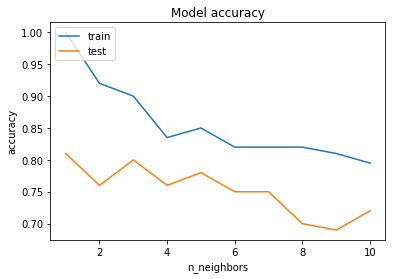

In [6]:
# Summarize training and testing accuracies
plt.plot([i for i in range(1, 11)], train_acc)
plt.plot([i for i in range(1, 11)], test_acc)
plt.title('Model accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()